# Data Cleaning and Preparation

Index:
1. [**Raw data reading and formatting**](#raw)<br>
2. [**Records removal**](#removal)<br>
3. [**Type conversion**](#conversion)<br>
4. [**Dropping empty columns**](#dropping)<br>
5. [**Replacing nan with 0 in the dm attribute**](#replacing)<br>
6. [**KNN Algorithm**](#KNN)<br>
7. [**Duplicates removal**](#duplicates)<br>
8. [**Alignmetn**](#alignment)<br>
9. [**New files writing**](#newfiles)<br>
10. [**Positive/Negative distribution**](#posneg)<br>
11. [**Value distribution across several levels**](#violin)<br>


In this python script, data cleaning and preparation is executed. First, we read raw data from source files and then we proceeded in formatting them for increasing the readibility, erasing invalid records, replacing missing values and dropping empty columns. For performing this activity we import different libraries:<br>
PANDAS for reading csv files and manipulating datasets;<br>
NUMPY for manipulating data structures;<br>
SKLEARN for running the KNN algorithm in order to substitute missing values;<br>
OS for having access to system information, as the execution path;<br>
SEABORN for visualizing data and representing them by using graphs and visualization tools;<br>
WARNINGS for ignoring eventual warnings.

In [72]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

<a id='raw'></a>
## Raw data reading and formatting

In this section of the raw data are read from the source ".csv" files by using the pandas library. Then as raw data were missing attributes' name, they were formatted by adding to each column its demonitation. Moreover, each record was splitted in 6 lines that were merged together in one row. After performing this operation the dataframes were built.

In [73]:
dirname = os.path.abspath('')

cleveland_filename = os.path.join(dirname, 'cleveland.csv')
hungarian_filename = os.path.join(dirname, 'hungarian.csv')
longBeach_filename = os.path.join(dirname, 'long-beach-va.csv')
switzerland_filename = os.path.join(dirname, 'switzerland.csv')

cleveland_data = pd.read_csv(cleveland_filename, sep=',',  error_bad_lines=False, encoding='iso-8859-1')
hungarian_data = pd.read_csv(hungarian_filename, sep=',',  error_bad_lines=False, encoding='iso-8859-1')
longBeach_data = pd.read_csv(longBeach_filename, sep=',',  error_bad_lines=False, encoding='iso-8859-1')
switzerland_data = pd.read_csv(switzerland_filename, sep=',',  error_bad_lines=False, encoding='iso-8859-1')

"""all the data were without header so I needed to redefine them"""
columns_names = ["id","ccf","age","sex","painloc","painexer","relrest","pncaden",
                   "cp","trestbps","htn","chol","smoke","cigs","years","fbs","dm",
                   "famhist","restecg","ekgmo","ekgday","ekgyr","dig","prop","nitr",
                   "pro","diuretic","proto","thaldur","thaltime","met","thalach",
                   "thalrest","tpeakbps","tpeakbpd","dummy","trestbpd","exang",
                   "xhypo","oldpeak","slope","rldv5","rldv5e","ca","restckm","exerckm",
                   "restef","restwm","exeref","exerwm","thal","thalsev","thalpul",
                   "earlobe","cmo","cday","cyr","num","lmt","ladprox","laddist","diag",
                   "cxmain","ramus","om1","om2","rcaprox","rcadist","lvx1","lvx2","lvx3",
                   "lvx4","lvf","cathef","junk","name"]
df_cleveland = pd.DataFrame(columns = columns_names)
df_hungarian = pd.DataFrame(columns = columns_names)
df_longBeach = pd.DataFrame(columns = columns_names)
df_switzerland = pd.DataFrame(columns = columns_names)

first_values_cleveland = list(cleveland_data.columns)
first_values_hungarian = list(hungarian_data.columns)
first_values_longBeach = list(longBeach_data.columns)
first_values_switzerland = list(switzerland_data.columns)

cleveland_data_list = cleveland_data.values.tolist()
hungarian_data_list = hungarian_data.values.tolist()
longBeach_data_list = longBeach_data.values.tolist()
switzerland_data_list = switzerland_data.values.tolist()

cleveland_list = [first_values_cleveland] + cleveland_data_list
hungarian_list = [first_values_hungarian] + hungarian_data_list
longBeach_list = [first_values_longBeach] + longBeach_data_list
switzerland_list = [first_values_switzerland] + switzerland_data_list

def buildDataFrame(startList, df):
    record = []
    for index in range(len(startList)):
        if((index+1)%10==0):
            values = list(startList[index][0].split(";"))
            record = record + values[0:5]
            del record[7]
            df.loc[len(df)] = record
            record = []
        else:
            values = list(startList[index][0].split(";"))
            record = record + values
    return df

### Cleveland dataset before being treated

In [74]:
buildDataFrame(cleveland_list, df_cleveland)

,id,ccf,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,...,rcaprox,rcadist,lvx1,lvx2,lvx3,lvx4,lvf,cathef,junk,name
0,1,0,63,1,-9,-9,-9,-9,1,145,...,1,1,1,1,1,1,1,-9,-9,name
1,2,0,67,1,-9,-9,-9,-9,4,160,...,1,1,1,1,1,1,1,-9,-9,name
2,3,0,67,1,-9,-9,-9,-9,4,120,...,2,2,1,1,1,7,3,-9,-9,name
3,4,0,37,1,-9,-9,-9,-9,3,130,...,1,1,1,1,1,1,1,-9,-9,name
4,6,0,41,0,-9,-9,-9,-9,2,130,...,1,1,1,1,1,1,1,-9,-9,name
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,01-set,20-set,20--51,0,541,-9,1,-9,62,133,...,8223,13,0,0,0,167,,,,
294,16781,481,487,854,1,2,9,-9,1,-9,...,-9,-9,,,,-9,4,3,85,3
295,-9,1,-9,1,1,,,-9,1,-9,...,-9,6,,,,9,-9,-9,6,
296,94,1,-9,-9,-9,,,-9,357,-57,...,,,,,,0,-,,,


### Switzerland dataset before being treated

In [75]:
buildDataFrame(switzerland_list, df_switzerland)

,id,ccf,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,...,rcaprox,rcadist,lvx1,lvx2,lvx3,lvx4,lvf,cathef,junk,name
0,3001,0,65,1,1,1,1,-9,4,115,...,1,1,1,1,1,1,1,75,-9.,name
1,3002,0,32,1,0,0,0,-9,1,95,...,1,1,1,1,1,5,1,63,-9.,name
2,3003,0,61,1,1,1,1,-9,4,105,...,2,1,1,1,1,1,1,67,-9.,name
3,3004,0,50,1,1,1,1,-9,4,145,...,1,1,1,1,1,5,4,36,-9.,name
4,3005,0,57,1,1,1,1,-9,4,110,...,2,1,1,1,1,1,1,60,-9.,name
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,4070,0,54,1,1,1,1,-9,4,180,...,1,1,1,1,1,1,1,71,-9.,name
119,4071,0,56,1,1,1,1,-9,4,125,...,2,1,5,1,1,1,2,68,-9.,name
120,4072,0,56,1,0,1,1,-9,3,125,...,1,1,1,1,5,3,2,61,-9.,name
121,4073,0,54,1,1,1,1,-9,4,130,...,2,1,1,1,1,1,1,-9.,-9.,name


### Hungaria dataset before being cleaned

In [76]:
buildDataFrame(hungarian_list, df_hungarian)

,id,ccf,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,...,rcaprox,rcadist,lvx1,lvx2,lvx3,lvx4,lvf,cathef,junk,name
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,1053,0,48,0,0,0,0,-9,2,-9,...,-9,-9,1,1,1,1,1,-9.,-9.,name
290,1054,0,36,1,1,0,0,-9,2,120,...,-9,-9,1,1,1,1,1,-9.,-9.,name
291,5001,0,48,1,0,0,0,-9,3,110,...,-9,-9,1,1,1,1,1,-9.,-9.,name
292,5000,0,47,0,0,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name


### Longbeach dataset before being cleaned

In [77]:
buildDataFrame(longBeach_list, df_longBeach)

,id,ccf,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,...,rcaprox,rcadist,lvx1,lvx2,lvx3,lvx4,lvf,cathef,junk,name
0,1,0,63,1,1,1,1,-9,4,140,...,2,1,1,1,1,1,1,0.7,5.5,name
1,2,0,44,1,1,1,1,-9,4,130,...,1,1,1,1,1,1,1,0.5,-9.,name
2,3,0,60,1,1,1,1,-9,4,132,...,2,1,1,1,1,7,2,0.52,4.1,name
3,4,0,55,1,1,1,1,-9,4,142,...,1,1,1,1,1,1,1,0.73,6.5,name
4,5,0,66,1,1,0,0,-9,3,110,...,1,1,1,1,1,1,1,0.73,8,name
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,200,0,54,0,1,1,1,-9,4,127,...,1,1,1,1,1,1,1,0.76,5.6,name
196,201,0,62,1,0,0,0,-9,1,-9,...,1,1,1,1,1,1,2,0.62,3.5,name
197,202,0,55,1,1,1,1,-9,4,122,...,2,1,1,1,1,1,1,0.69,5.6,name
198,116,0,58,1,1,1,1,-9,4,-9,...,1,1,1,1,1,1,1,0.81,6,name


<a id='removal'></a>
## Records removal

By observing each dataset, we noticed that the Cleveland dataframe was containing 16 lines of corrupted data, where each column was presenting non-sense values. 

In [78]:
df_cleveland = df_cleveland[:-16]

<a id='conversion'></a>
## Type conversion 

In this section, numerical data are transformed from string to numerical type, so that it was possible to use them in the next phases of the machine learning process. In addition, by following the "header.names" file, we understood that the value "-9" was used for representing missing values. Thus, in order to simplify the following operations we replaced all the "-9" with nan.

In [79]:
def convertType(df):
    cols = df.columns
    for c in cols:
        try:
            df[c] = pd.to_numeric(df[c])
        except:
            pass

convertType(df_cleveland)
convertType(df_hungarian)
convertType(df_longBeach)
convertType(df_switzerland)

df_cleveland = df_cleveland.replace(-9, np.nan)
df_hungarian = df_hungarian.replace(-9, np.nan)
df_longBeach = df_longBeach.replace(-9, np.nan)
df_switzerland = df_switzerland.replace(-9, np.nan)

<a id='dropping'></a>
## Dropping empty columns

In section we dropped all the columns containing nan values for each record, as it is not possible to use them in the machine learning model building.

In [80]:
df_cleveland = df_cleveland.dropna(axis=1, how="all")
df_hungarian = df_hungarian.dropna(axis=1, how="all")
df_longBeach = df_longBeach.dropna(axis=1, how="all")
df_switzerland = df_switzerland.dropna(axis=1, how="all")

<a id='replacing'></a>
## Replacing nan with 0 in the dm attribute 

As the type of the "dm" attribute was boolean, we hypothesised that whenever a value was missing was supposed to be 0. Hence, we proceeded in the substitution of all the nan value with 0.

In [81]:
df_cleveland["dm"] = df_cleveland["dm"].replace(np.nan, 0)
df_hungarian["dm"] = df_hungarian["dm"].replace(np.nan, 0)
df_longBeach["dm"] = df_longBeach["dm"].replace(np.nan, 0)
df_switzerland["dm"] = df_switzerland["dm"].replace(np.nan, 0)

<a id='KNN'></a>
## KNN Algorithm

In this section the KNN algorithm was applied to all the columns that were containg at least one missing value. The KNN algorithm allows to fill a nan value with data obtained from the closest neighbours to it.

In [82]:
cleveland_nancols = df_cleveland.loc[:, df_cleveland.isna().any()]
hungarian_nancols = df_hungarian.loc[:, df_hungarian.isna().any()]
longBeach_nancols = df_longBeach.loc[:, df_longBeach.isna().any()]
switzerland_nancols = df_switzerland.loc[:, df_switzerland.isna().any()]

cleveland_nancols_list = cleveland_nancols.values.tolist()
hungarian_nancols_list = hungarian_nancols.values.tolist()
longBeach_nancols_list = longBeach_nancols.values.tolist()
switzerland_nancols_list = switzerland_nancols.values.tolist()

imputer = KNNImputer(n_neighbors=2)

cleveland_nanrecovered = imputer.fit_transform(cleveland_nancols_list)
hungarian_nanrecovered = imputer.fit_transform(hungarian_nancols_list)
longBeach_nanrecovered = imputer.fit_transform(longBeach_nancols_list)
switzerland_nanrecovered = imputer.fit_transform(switzerland_nancols_list)

def fillNanValues(df, arrayFull):
    cols = df.columns
    cont = 0
    for c in cols:
        if df[c].isnull().values.any():
            df[c] = arrayFull[cont]
            cont = cont + 1
            
fillNanValues(df_cleveland, cleveland_nanrecovered.transpose())
fillNanValues(df_hungarian, hungarian_nanrecovered.transpose())
fillNanValues(df_longBeach, longBeach_nanrecovered.transpose())
fillNanValues(df_switzerland, switzerland_nanrecovered.transpose())

<a id='duplicates'></a>
## Duplicates removal

Duplicated records and the name attribute were removed in this phase.

In [83]:
df_cleveland = df_cleveland.drop_duplicates()
df_switzerland = df_switzerland.drop_duplicates()
df_hungarian = df_hungarian.drop_duplicates()
df_longBeach = df_longBeach.drop_duplicates()

df_cleveland = df_cleveland.drop(columns=['name'])
df_switzerland = df_switzerland.drop(columns=['name'])
df_hungarian = df_hungarian.drop(columns=['name'])
df_longBeach = df_longBeach.drop(columns=['name'])

<a id='zeros'></a>
## Zero removal

Columns containing all zeros are removed in this part.

In [84]:
def zeroRemoval(df):
    cols = df.columns
    for c in cols:
        if (df[c] == 0).all():
            df = df.drop(columns=[c])
    return df

df_cleveland = zeroRemoval(df_cleveland)
df_switzerland = zeroRemoval(df_switzerland)
df_hungarian = zeroRemoval(df_hungarian)
df_longBeach = zeroRemoval(df_longBeach)

<a id='alignment'></a>
## Data collections alignment

After the cleaning activity performed on each of the four data collections, they were containing different attributes and thus there was the necessity of performing an alignment. In order to finalize this operation we transform each table's list of columns in sets and we found the intersection among them.

In [85]:
def alignColumns(df, fc):
    cols = df.columns
    for c in cols:
        if c not in fc:
            df = df.drop(columns=[c])
    return df

clevelandColumns = df_cleveland.columns
switzerlandColumns = df_switzerland.columns
hungarianColumns = df_hungarian.columns
longBeachColumns = df_longBeach.columns

setCleveland = set(clevelandColumns)
setSwitzerland = set(switzerlandColumns)
setHungarian = set(hungarianColumns)
setLongBeach = set(longBeachColumns)

firstIntersection = setCleveland.intersection(setSwitzerland)
secondIntersection = firstIntersection.intersection(setHungarian)
thirdIntersection = secondIntersection.intersection(setLongBeach)

finalColumns = list(thirdIntersection)

df_cleveland = alignColumns(df_cleveland, finalColumns)
df_switzerland = alignColumns(df_switzerland, finalColumns)
df_hungarian = alignColumns(df_hungarian, finalColumns)
df_longBeach = alignColumns(df_longBeach, finalColumns)

<a id='newfiles'></a>
## New files writing

In the end the new ".csv" files contained the cleaned and formatted dataframes were written.

In [86]:
df_cleveland.to_csv('clevelandFinal.csv', index=False)
df_switzerland.to_csv('switzerlandFinal.csv', index=False)
df_hungarian.to_csv('hungarianFinal.csv', index=False)
df_longBeach.to_csv('longBeachFinal.csv', index=False)

<a id='posneg'></a>
## Distribution of positive and negative cases

After writing the ".csv" files containining the cleaned and prepared data, we proceeded in analysing the distribution of positive case (people who suffer of an heart condition) and negative (people without heart condition). We represented the data by using an histogram which shows the number of positive and negative instances.

In [87]:
def caseDistribution(df):
    df.loc[df['num'] > 0, 'num'] = 1
    y=df['num'].tolist()
    y_df=pd.DataFrame({'diagnosis':y})
    ax = sns.countplot(y,label="Number of cases")       # M (1) = 56, B (0) = 18
    ax.set_title('Dataset balance for pos-neg cases')
    ax.set_xlabel('PCa cases: CI (0) and CS (1)')
    ax.set_ylabel('Number of cases')
    y_ci, y_cs = y_df.value_counts(sort=False)
    print('Number of Benign (CI): ', y_ci)
    print('Number of Malignant (CS) : ', y_cs)

### Cleveland dataset

In the Cleveland dataset the distribution between positive and negative cases is almost totally balanced with a number of benign cases of 157 and a number of malignant cases of 125.

Number of Benign (CI):  157
Number of Malignant (CS) :  125


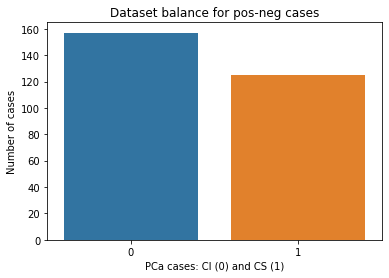

In [88]:
caseDistribution(df_cleveland)

### Switzerland dataset

In the Switzerland dataset the distribution between positive and negative cases is not balanced with a number of benign cases of 8 and a number of malignant cases of 115. This requires to perform a random class balancing in the phase of building the machine learning model. 

Number of Benign (CI):  8
Number of Malignant (CS) :  115


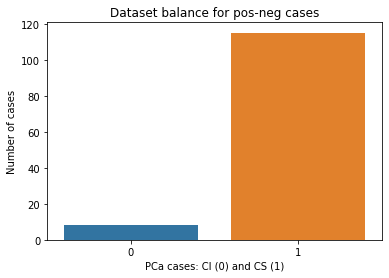

In [89]:
caseDistribution(df_switzerland)

### Hungaria dataset

In the Hungaria dataset the distribution between positive and negative cases is slightly unbalanced with a number of benign cases of 188 and a number of malignant cases of 106. Hence, also for this dataset we will perform a random class balancing before building the machine learning model. 

Number of Benign (CI):  188
Number of Malignant (CS) :  106


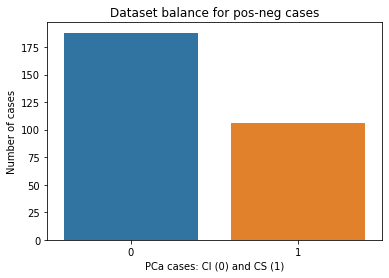

In [90]:
caseDistribution(df_hungarian)

### Long Beach dataset

In the Long Beach dataset the distribution between positive and negative cases is not balanced with a number of benign cases of 51 and a number of malignant cases of 149. This requires to perform a random class balancing in the phase of building the machine learning model. 

Number of Benign (CI):  51
Number of Malignant (CS) :  149


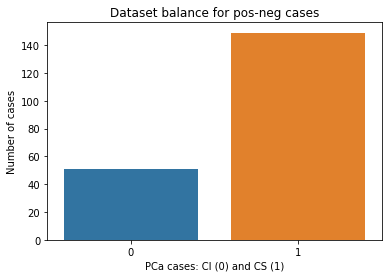

In [91]:
caseDistribution(df_longBeach)

<a id='violin'></a>
## Value distribution across several levels

In this phase we represented the distribution of positive and negative cases, related to each attribute contained in the dataset. For doing this, we used a violin plot, which plays the similar role of a box plot and a whisker plot. In detail, it shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution. Before creating each box plot, we performed a data standardization in order to have them all in a uniform format. For the standardization we used the following formula: 
$$
X_{std} = \frac{X - mean}{sd}
$$
where <i>mean</i> is the average value and <i>sd</i> is the standard deviation. 
In all the datasets it is possible to obseve a homogeneous distribution for almost all the attributes that usually acquire a standardized value among 2 and -2. However there are some exceptions that might communicate which attributes we should not consider.

In [92]:
# first ten features
def distributionLevels(df):
    df.loc[df['num'] > 0, 'num'] = 1
    y=df['num'].tolist()
    y_df=pd.DataFrame({'diagnosis':y})
    df_features = df.drop(['id', 'proto', 'lvx1', 'lvx2', 'num'], axis = 1)
    data=df_features
    data_n_2 = (data - data.mean()) / (data.std())              # standardization
    data = pd.concat([y_df,data_n_2],axis=1)
    data = pd.melt(data,id_vars="diagnosis",
                        var_name="features",
                        value_name='value')
    plt.figure(figsize=(25,10))
    sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
    plt.xticks(rotation=90)

### Cleveland dataset

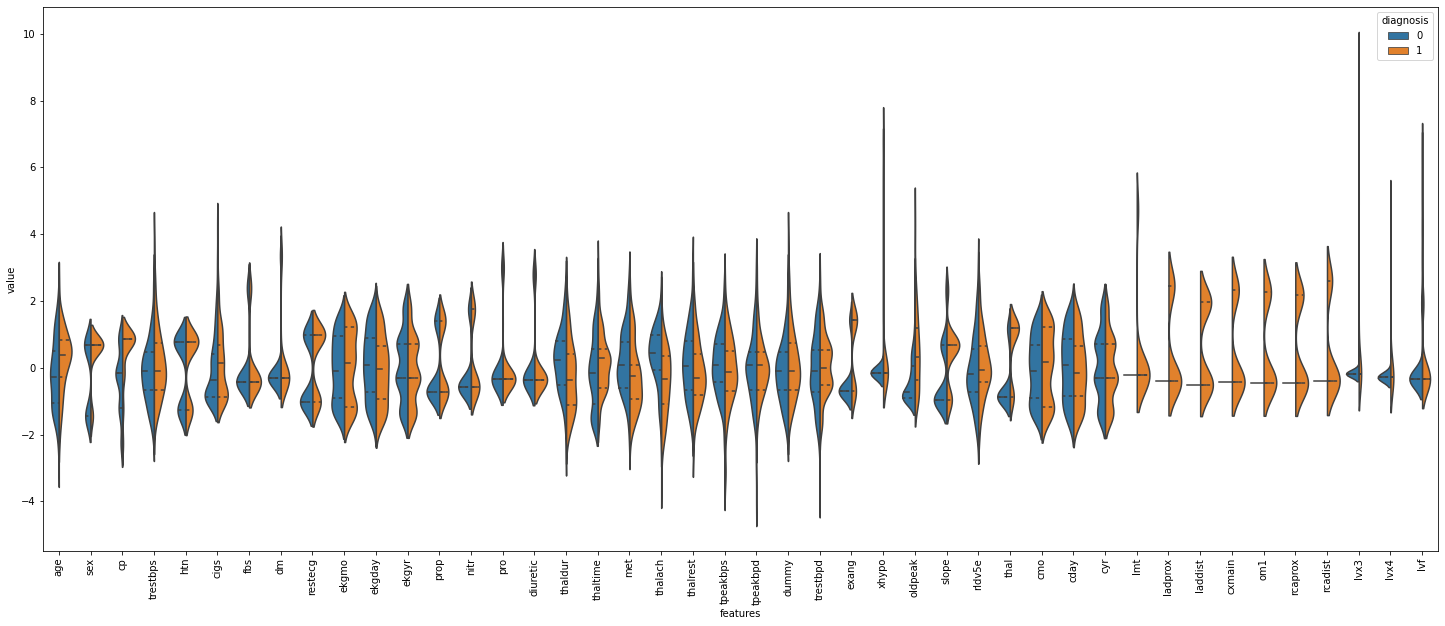

In [93]:
distributionLevels(df_cleveland)

### Switzerland dataset

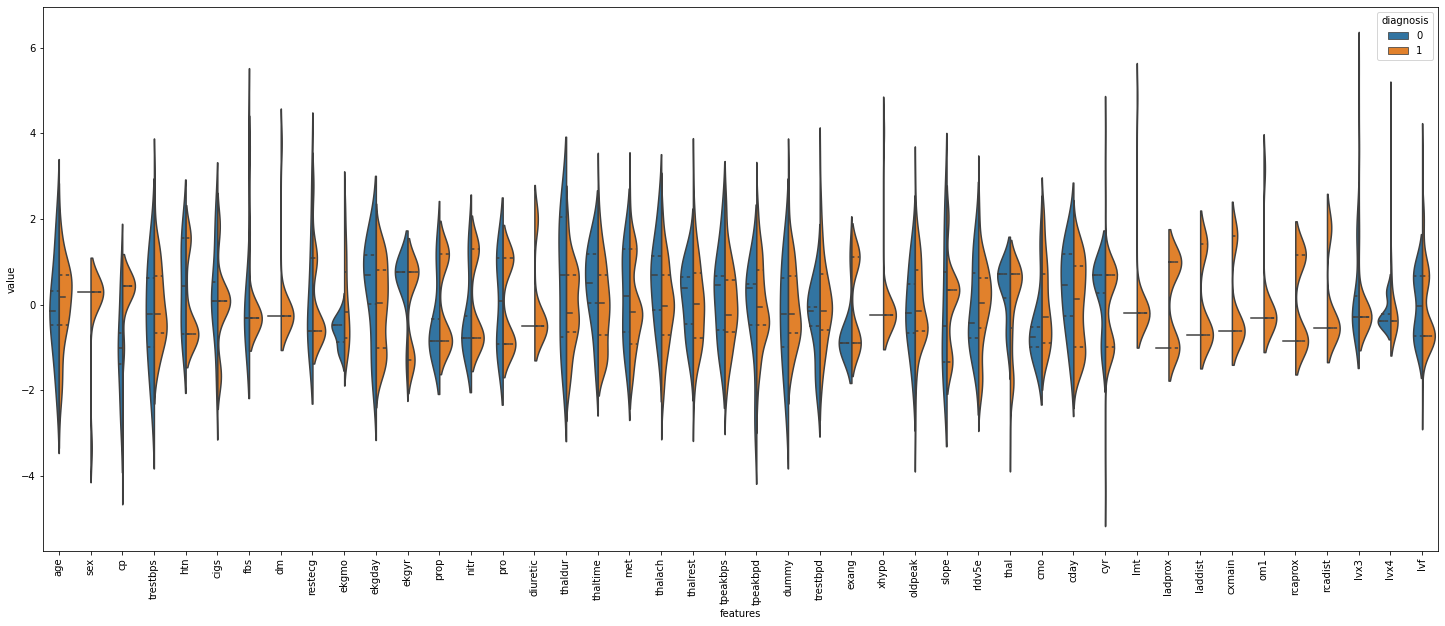

In [94]:
distributionLevels(df_switzerland)

### Hungaria dataset

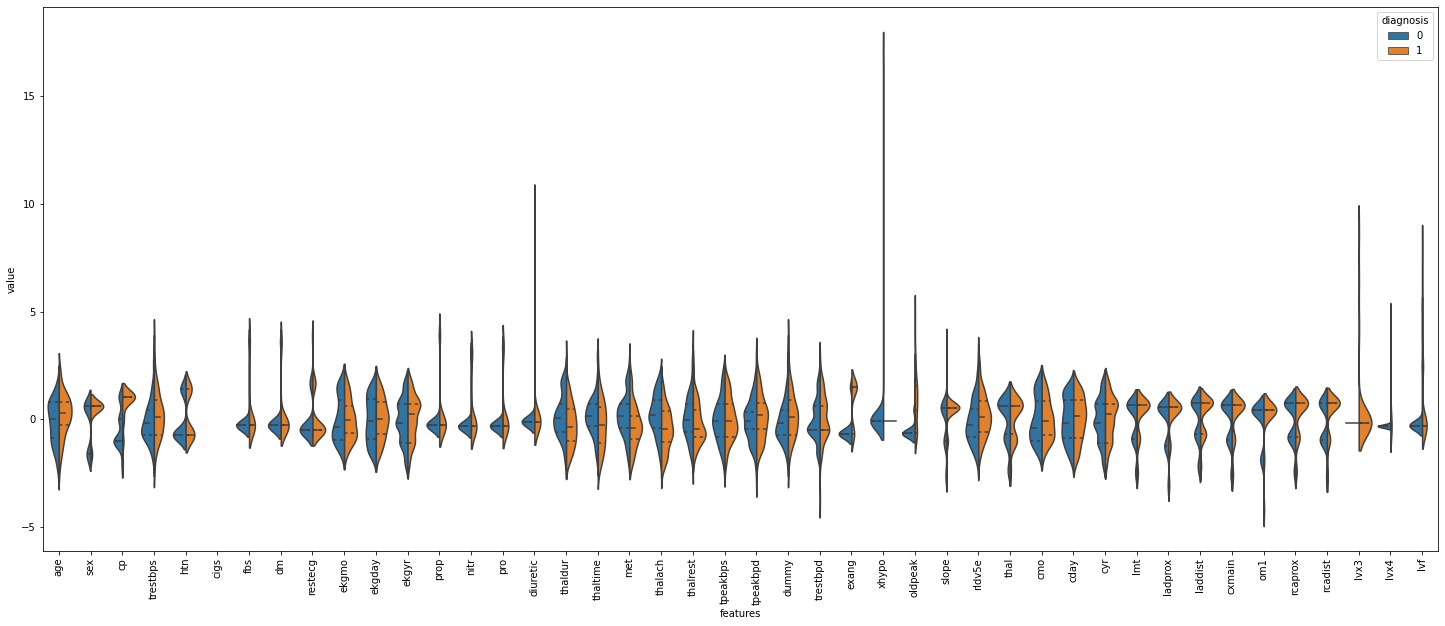

In [95]:
distributionLevels(df_hungarian)

### Longbeach dataset

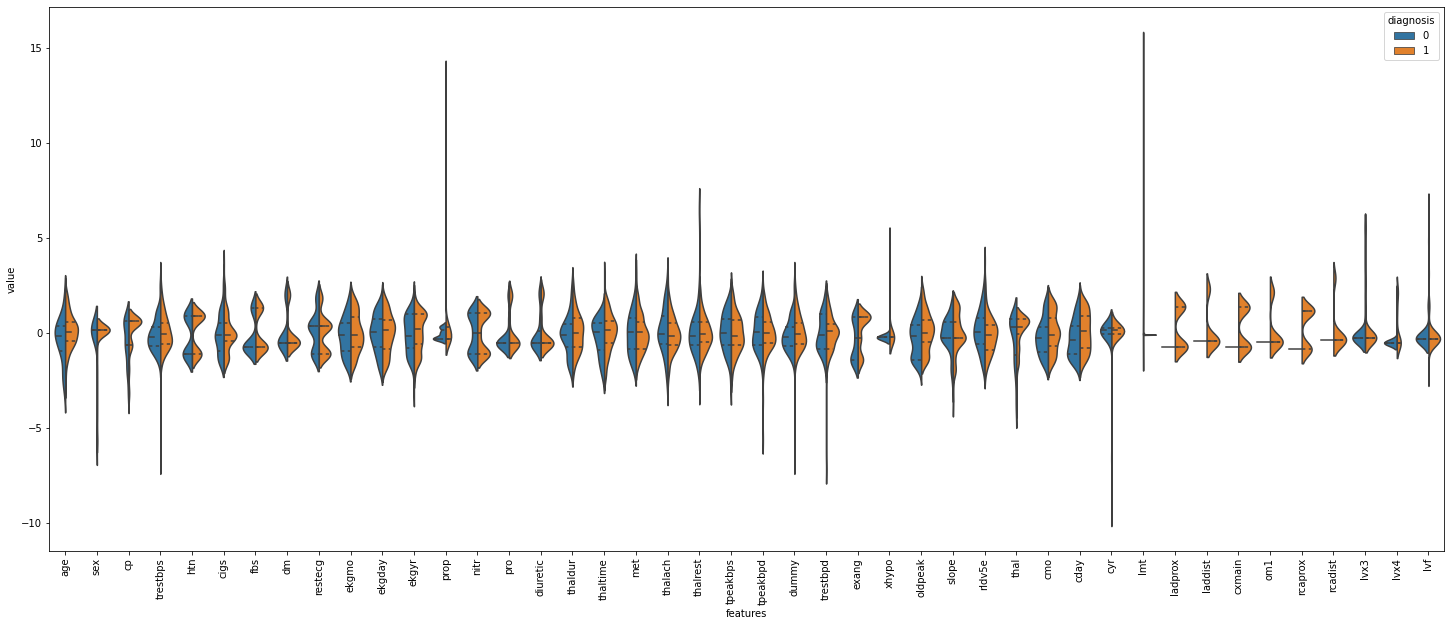

In [96]:
distributionLevels(df_longBeach)